<a href="https://colab.research.google.com/github/sarahgylee/RFM_analysis/blob/main/Customer_Segmentation_Analysis_of_UK_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Analysis of UK Retail Sales Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: prepare the data and churn rate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2021 Data Analysis Project/online_clean.csv', sep='|')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685559 entries, 0 to 685558
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice       685559 non-null  int64  
 1   StockCode     685559 non-null  object 
 2   Description   685559 non-null  object 
 3   Quantity      685559 non-null  int64  
 4   Invoice_time  685559 non-null  object 
 5   Price         685559 non-null  float64
 6   CustomerID    685559 non-null  float64
 7   Country       685559 non-null  object 
 8   Purchase_dt   685559 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 47.1+ MB


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
0,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
1,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
2,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28,2.55,14590.0,United Kingdom,2010-01-04
3,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28,4.25,14590.0,United Kingdom,2010-01-04
4,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28,6.95,14590.0,United Kingdom,2010-01-04


- pandas.to_datetime() convert object to date

In [ ]:
df['Purchase_dt']=pd.to_datetime(df['Purchase_dt'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685559 entries, 0 to 685558
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       685559 non-null  int64         
 1   StockCode     685559 non-null  object        
 2   Description   685559 non-null  object        
 3   Quantity      685559 non-null  int64         
 4   Invoice_time  685559 non-null  object        
 5   Price         685559 non-null  float64       
 6   CustomerID    685559 non-null  float64       
 7   Country       685559 non-null  object        
 8   Purchase_dt   685559 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 47.1+ MB


check date range

In [ ]:
(df['Purchase_dt'].min(),df['Purchase_dt'].max())

(Timestamp('2010-01-04 00:00:00'), Timestamp('2011-12-23 00:00:00'))

select one year data as observation window:

In [ ]:
df_obs = df.loc[(df['Purchase_dt'] >= '2010-02-01') & (df['Purchase_dt'] <= '2011-01-31')]

In [ ]:
df_obs['Purchase_dt'].unique()

array(['2010-02-01T00:00:00.000000000', '2010-02-02T00:00:00.000000000',
       '2010-02-03T00:00:00.000000000', '2010-02-04T00:00:00.000000000',
       '2010-02-05T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-02-08T00:00:00.000000000', '2010-02-09T00:00:00.000000000',
       '2010-02-10T00:00:00.000000000', '2010-02-11T00:00:00.000000000',
       '2010-02-12T00:00:00.000000000', '2010-02-14T00:00:00.000000000',
       '2010-02-15T00:00:00.000000000', '2010-02-16T00:00:00.000000000',
       '2010-02-17T00:00:00.000000000', '2010-02-18T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-21T00:00:00.000000000',
       '2010-02-22T00:00:00.000000000', '2010-02-23T00:00:00.000000000',
       '2010-02-24T00:00:00.000000000', '2010-02-25T00:00:00.000000000',
       '2010-02-26T00:00:00.000000000', '2010-02-28T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-03-02T00:00:00.000000000',
       '2010-03-03T00:00:00.000000000', '2010-03-04

create the dataframe for post-observation period

In [ ]:
df_after = df.loc[(df['Purchase_dt'] > '2011-01-31')]

In [ ]:
df_after['Purchase_dt'].unique()

array(['2011-02-01T00:00:00.000000000', '2011-02-02T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-02-04T00:00:00.000000000',
       '2011-02-06T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-02-08T00:00:00.000000000', '2011-02-09T00:00:00.000000000',
       '2011-02-10T00:00:00.000000000', '2011-02-11T00:00:00.000000000',
       '2011-02-13T00:00:00.000000000', '2011-02-14T00:00:00.000000000',
       '2011-02-15T00:00:00.000000000', '2011-02-16T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-18T00:00:00.000000000',
       '2011-02-20T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-02-22T00:00:00.000000000', '2011-02-23T00:00:00.000000000',
       '2011-02-24T00:00:00.000000000', '2011-02-25T00:00:00.000000000',
       '2011-02-27T00:00:00.000000000', '2011-02-28T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-03-02T00:00:00.000000000',
       '2011-03-03T00:00:00.000000000', '2011-03-04

return customers in observation window and customers post-observation window：

In [ ]:
cus_list=df_obs['CustomerID'].unique()

In [ ]:
cus_list.shape

(3894,)

In [ ]:
cus_after_list=df_after['CustomerID'].unique()

In [ ]:
cus_after_list.shape

(3857,)

use np.isin(element, test_elements, assume_unique=False, invert=False)to check whether customers in obs window repurchased

In [ ]:
np.isin(cus_list, cus_after_list)

array([ True, False,  True, ...,  True, False, False])

In [ ]:
np.isin(cus_list, cus_after_list).shape

(3894,)

define churned customers：

In [ ]:
num_remain= cus_list[np.isin(cus_list, cus_after_list)]

In [ ]:
num_left = cus_list[~np.isin(cus_list, cus_after_list)]

In [ ]:
print(num_remain.shape[0], num_left.shape[0], cus_list.shape[0])

2491 1403 3894


In [ ]:
churn_rate = (num_left.shape[0] / cus_list.shape[0]) * 100

In [ ]:
print(round(churn_rate, 2),'%')

36.03 %


## Step 2：Customer segmentation analysis based on Recency, Frequency, Monetary value (RFM)

1. Recency: the period between last purchase and 'current'
2. Frequency: the average number of purchase within a concern period
3. Monetary: the average purhcase dollar amount within a concern period



**1. Recency**

- Define the 'curent'

In [ ]:
df_rfm=df_obs.copy()

In [ ]:
df_rfm.loc[:,'current'] = pd.to_datetime('2011-02-01')

In [ ]:
df_rfm['current'] == '2011-01-01'

19251     False
19252     False
19253     False
19254     False
19255     False
          ...  
364440    False
364441    False
364442    False
364443    False
364444    False
Name: current, Length: 345194, dtype: bool

- calculate the range

In [ ]:
df_rfm['range']=df_rfm['current']-df_rfm['Purchase_dt']

In [ ]:
df_rfm.head(10)

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range
19251,496349,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19252,496349,21524,SPOTTY HOME SWEET HOME DOORMAT,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19253,496349,48116,DOOR MAT MULTICOLOUR STRIPE,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19254,496349,48129,DOOR MAT TOPIARY,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19255,496349,48138,DOOR MAT UNION FLAG,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19256,496349,48189,DOOR MAT FRIENDSHIP,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19257,496349,48194,DOORMAT HEARTS,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19258,496349,48197,DOOR MAT BIRD ON THE WIRE,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19259,496349,84971S,SMALL HEART FLOWERS HOOK,24,2010-02-01 8:13,0.85,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days
19260,496349,85178,VICTORIAN SEWING KIT,12,2010-02-01 8:13,1.25,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days


- return the minimal range

In [ ]:
df_rfm.groupby('CustomerID')['range'].min()

CustomerID
12346.0    14 days
12608.0    93 days
12745.0   175 days
12746.0   229 days
12747.0    12 days
            ...   
18283.0     9 days
18284.0   120 days
18285.0   349 days
18286.0   165 days
18287.0    71 days
Name: range, Length: 3894, dtype: timedelta64[ns]

In [ ]:
#check:
df_rfm.loc[df_rfm['CustomerID']==18287.0]

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range
106736,508581,22243,"HOOK, 5 HANGER ,MAGIC TOADSTOOL RED",12,2010-05-17 11:55,1.65,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days
106737,508581,22246,"GARLAND, MAGIC GARDEN 1.8M",12,2010-05-17 11:55,1.95,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days
106738,508581,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-05-17 11:55,12.75,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days
106739,508581,21439,BASKET OF TOADSTOOLS,12,2010-05-17 11:55,1.25,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days
106740,508581,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2010-05-17 11:55,1.65,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days
...,...,...,...,...,...,...,...,...,...,...,...
306448,534346,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-11-22 11:51,2.10,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days
306449,534346,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51,1.45,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days
306450,534346,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51,1.45,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days
306451,534346,85040A,S/4 PINK FLOWER CANDLES IN BOWL,48,2010-11-22 11:51,1.45,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days


**2. Frequency**

In [ ]:
df_rfm.groupby('CustomerID')['Invoice'].nunique()

CustomerID
12346.0     3
12608.0     1
12745.0     2
12746.0     1
12747.0    15
           ..
18283.0     8
18284.0     1
18285.0     1
18286.0     1
18287.0     4
Name: Invoice, Length: 3894, dtype: int64

In [ ]:
#check
df_rfm.loc[df_rfm['CustomerID']==12745.0]

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range
105135,508457,21232,STRAWBERRY CERAMIC TRINKET BOX,72,2010-05-14 16:50,1.06,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105136,508457,22649,STRAWBERRY FAIRY CAKE TEAPOT,24,2010-05-14 16:50,4.25,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105137,508457,84992,72 SWEETHEART FAIRY CAKE CASES,24,2010-05-14 16:50,0.55,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105138,508457,22067,CHOC TRUFFLE GOLD TRINKET POT,36,2010-05-14 16:50,1.45,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105139,508457,22064,PINK DOUGHNUT TRINKET POT,48,2010-05-14 16:50,1.45,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105140,508457,84991,60 TEATIME FAIRY CAKE CASES,24,2010-05-14 16:50,0.55,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105141,508457,47591D,PINK FAIRY CAKE CHILD'S APRON,16,2010-05-14 16:50,1.95,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105142,508457,22367,CHILDS APRON SPACEBOY DESIGN,16,2010-05-14 16:50,1.95,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105143,508457,22626,BLACK KITCHEN SCALES,4,2010-05-14 16:50,8.50,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days
105144,508457,22625,RED KITCHEN SCALES,4,2010-05-14 16:50,8.50,12745.0,United Kingdom,2010-05-14,2011-02-01,263 days


**3. Monetary**

In [ ]:
df_rfm['TotalPrice'] = df_rfm['Quantity'] * df_rfm['Price']

In [ ]:
df_rfm.groupby('CustomerID')['TotalPrice'].sum()

CustomerID
12346.0    77352.96
12608.0      415.79
12745.0      723.85
12746.0      254.55
12747.0     4679.78
             ...   
18283.0      833.12
18284.0      461.68
18285.0      427.00
18286.0      833.48
18287.0     2345.71
Name: TotalPrice, Length: 3894, dtype: float64

In [ ]:
#check:
df_rfm.loc[df_rfm['CustomerID']==18287.0]

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range,TotalPrice
106736,508581,22243,"HOOK, 5 HANGER ,MAGIC TOADSTOOL RED",12,2010-05-17 11:55,1.65,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days,19.80
106737,508581,22246,"GARLAND, MAGIC GARDEN 1.8M",12,2010-05-17 11:55,1.95,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days,23.40
106738,508581,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-05-17 11:55,12.75,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days,12.75
106739,508581,21439,BASKET OF TOADSTOOLS,12,2010-05-17 11:55,1.25,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days,15.00
106740,508581,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2010-05-17 11:55,1.65,18287.0,United Kingdom,2010-05-17,2011-02-01,260 days,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...
306448,534346,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-11-22 11:51,2.10,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days,25.20
306449,534346,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51,1.45,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days,69.60
306450,534346,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51,1.45,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days,69.60
306451,534346,85040A,S/4 PINK FLOWER CANDLES IN BOWL,48,2010-11-22 11:51,1.45,18287.0,United Kingdom,2010-11-22,2011-02-01,71 days,69.60


In [ ]:
df_obs

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt
19251,496349,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01
19252,496349,21524,SPOTTY HOME SWEET HOME DOORMAT,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01
19253,496349,48116,DOOR MAT MULTICOLOUR STRIPE,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01
19254,496349,48129,DOOR MAT TOPIARY,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01
19255,496349,48138,DOOR MAT UNION FLAG,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01
...,...,...,...,...,...,...,...,...,...
364440,542745,22617,BAKING SET SPACEBOY DESIGN,8,2011-01-31 16:47,4.95,15881.0,United Kingdom,2011-01-31
364441,542745,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,45,2011-01-31 16:47,2.10,15881.0,United Kingdom,2011-01-31
364442,542745,22138,BAKING SET 9 PIECE RETROSPOT,13,2011-01-31 16:47,4.95,15881.0,United Kingdom,2011-01-31
364443,542746,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-01-31 16:48,0.95,15881.0,United Kingdom,2011-01-31


In [ ]:
df_rfm

,Invoice,StockCode,Description,Quantity,Invoice_time,Price,CustomerID,Country,Purchase_dt,current,range,TotalPrice
19251,496349,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19252,496349,21524,SPOTTY HOME SWEET HOME DOORMAT,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19253,496349,48116,DOOR MAT MULTICOLOUR STRIPE,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19254,496349,48129,DOOR MAT TOPIARY,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
19255,496349,48138,DOOR MAT UNION FLAG,2,2010-02-01 8:13,6.75,14739.0,United Kingdom,2010-02-01,2011-02-01,365 days,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...
364440,542745,22617,BAKING SET SPACEBOY DESIGN,8,2011-01-31 16:47,4.95,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,39.60
364441,542745,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,45,2011-01-31 16:47,2.10,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,94.50
364442,542745,22138,BAKING SET 9 PIECE RETROSPOT,13,2011-01-31 16:47,4.95,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,64.35
364443,542746,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-01-31 16:48,0.95,15881.0,United Kingdom,2011-01-31,2011-02-01,1 days,1.90


- calcualte the final number for R, F and M

In [ ]:
rfm = df_rfm.groupby('CustomerID').agg(Recency=pd.NamedAgg(column='range', aggfunc='min'),
                                                  Frequency=pd.NamedAgg(column='Invoice', aggfunc='nunique'),
                                                  Monetary=pd.NamedAgg(column='TotalPrice', aggfunc='sum')
                                                 )

In [ ]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,14 days,3,77352.96
12608.0,93 days,1,415.79
12745.0,175 days,2,723.85
12746.0,229 days,1,254.55
12747.0,12 days,15,4679.78
...,...,...,...
18283.0,9 days,8,833.12
18284.0,120 days,1,461.68
18285.0,349 days,1,427.00


- use DataFrame.reset_index() to use default row index

In [ ]:
rfm=rfm.reset_index()

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  3894 non-null   float64        
 1   Recency     3894 non-null   timedelta64[ns]
 2   Frequency   3894 non-null   int64          
 3   Monetary    3894 non-null   float64        
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 121.8 KB


In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,14 days,3,77352.96
1,12608.0,93 days,1,415.79
2,12745.0,175 days,2,723.85
3,12746.0,229 days,1,254.55
4,12747.0,12 days,15,4679.78
...,...,...,...,...
3889,18283.0,9 days,8,833.12
3890,18284.0,120 days,1,461.68
3891,18285.0,349 days,1,427.00
3892,18286.0,165 days,1,833.48


- convert recency to numeric format

In [ ]:
rfm['Recency']=rfm['Recency']/np.timedelta64(1, 'D')

In [ ]:
rfm['Recency']

0        14.0
1        93.0
2       175.0
3       229.0
4        12.0
        ...  
3889      9.0
3890    120.0
3891    349.0
3892    165.0
3893     71.0
Name: Recency, Length: 3894, dtype: float64

In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3894.000000,3894.000000,3894.000000,3894.000000
mean,15568.840010,115.373395,4.294813,1801.765360
std,1582.580633,90.163785,7.146724,6397.430151
min,12346.000000,1.000000,1.000000,1.550000
25%,14208.250000,55.000000,1.000000,299.115000
50%,15588.500000,89.000000,2.000000,645.915000
75%,16949.750000,152.000000,5.000000,1597.482500
max,18287.000000,365.000000,153.000000,269603.310000


Rank by each RFM value and generate the score:

- use DataFrame.rank() to rank

In [ ]:
rfm['r_percentile'] = rfm['Recency'].rank(method='first',pct=True,ascending=True)
rfm['r_percentile']

0       0.087571
1       0.522599
2       0.785568
3       0.847714
4       0.077555
          ...   
3889    0.070621
3890    0.658706
3891    0.986133
3892    0.771957
3893    0.386492
Name: r_percentile, Length: 3894, dtype: float64

In [ ]:
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,r_percentile
0,12346.0,14.0,3,77352.96,0.087571
1,12608.0,93.0,1,415.79,0.522599
2,12745.0,175.0,2,723.85,0.785568
3,12746.0,229.0,1,254.55,0.847714
4,12747.0,12.0,15,4679.78,0.077555
5,12748.0,14.0,153,22561.52,0.087827
6,12749.0,88.0,4,2806.48,0.495378
7,12777.0,146.0,1,519.45,0.737031
8,12819.0,147.0,1,540.52,0.738829
9,12820.0,15.0,6,1434.35,0.093220


- use pandas.qcut() to create bins

In [ ]:
rfm['r_score'] = pd.qcut(rfm['r_percentile'], q=4, labels=range(4,0,-1))
rfm['r_score'].head(20)

0     4
1     2
2     1
3     1
4     4
5     4
6     3
7     2
8     2
9     4
10    1
11    3
12    1
13    4
14    4
15    2
16    2
17    3
18    1
19    3
Name: r_score, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [ ]:
rfm['r_score'].value_counts()

1    974
4    974
2    973
3    973
Name: r_score, dtype: int64

calculate for Frequency and Monetary

In [ ]:
rfm['m_percentile'] = rfm['Monetary'].rank(method='first', pct=True,ascending=False)
rfm['m_score'] = pd.qcut(rfm['m_percentile'], 4, labels=range(4,0,-1))
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,m_percentile,m_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.001541,4
1,12608.0,93.0,1,415.79,0.522599,2,0.639445,2
2,12745.0,175.0,2,723.85,0.785568,1,0.471238,3
3,12746.0,229.0,1,254.55,0.847714,1,0.787879,1
4,12747.0,12.0,15,4679.78,0.077555,4,0.063688,4
5,12748.0,14.0,153,22561.52,0.087827,4,0.007704,4
6,12749.0,88.0,4,2806.48,0.495378,3,0.131998,4
7,12777.0,146.0,1,519.45,0.737031,2,0.572162,2
8,12819.0,147.0,1,540.52,0.738829,2,0.561120,2
9,12820.0,15.0,6,1434.35,0.093220,4,0.277607,3


In [ ]:
rfm['f_percentile'] = rfm['Frequency'].rank(method='first',pct=True,ascending=False)
rfm['f_score'] = pd.qcut(rfm['f_percentile'], 4, labels=range(4,0,-1))
rfm.head(50)

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,m_percentile,m_score,f_percentile,f_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.001541,4,0.356703,3
1,12608.0,93.0,1,415.79,0.522599,2,0.639445,2,0.660760,2
2,12745.0,175.0,2,723.85,0.785568,1,0.471238,3,0.470981,3
3,12746.0,229.0,1,254.55,0.847714,1,0.787879,1,0.661017,2
4,12747.0,12.0,15,4679.78,0.077555,4,0.063688,4,0.037494,4
5,12748.0,14.0,153,22561.52,0.087827,4,0.007704,4,0.000257,4
6,12749.0,88.0,4,2806.48,0.495378,3,0.131998,4,0.268875,3
7,12777.0,146.0,1,519.45,0.737031,2,0.572162,2,0.661274,2
8,12819.0,147.0,1,540.52,0.738829,2,0.561120,2,0.661531,2
9,12820.0,15.0,6,1434.35,0.093220,4,0.277607,3,0.171546,4


In [ ]:
rfm['Frequency'].value_counts()

1      1322
2       739
3       445
4       342
5       215
6       164
7       144
8        97
9        79
10       52
11       48
12       38
13       24
14       23
16       23
15       17
17       16
18       13
21        9
20        9
23        7
19        7
24        7
31        4
30        4
45        3
22        3
32        3
29        2
39        2
27        2
40        2
26        2
74        2
36        2
28        1
34        1
38        1
153       1
46        1
25        1
87        1
63        1
51        1
43        1
41        1
37        1
33        1
122       1
48        1
114       1
99        1
86        1
64        1
58        1
54        1
52        1
110       1
Name: Frequency, dtype: int64

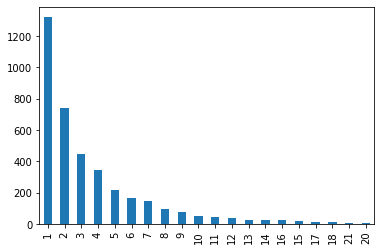

In [ ]:
rfm['Frequency'].value_counts()[:20].plot(kind='bar')

In [ ]:
(rfm['Frequency'].min(), rfm['Frequency'].max())

(1, 153)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,m_percentile,m_score,f_percentile,f_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.001541,4,0.356703,2
1,12608.0,93.0,1,415.79,0.522599,2,0.639445,2,0.660760,1
2,12745.0,175.0,2,723.85,0.785568,1,0.471238,3,0.470981,2
3,12746.0,229.0,1,254.55,0.847714,1,0.787879,1,0.661017,1
4,12747.0,12.0,15,4679.78,0.077555,4,0.063688,4,0.037494,4


- sum 3 scores and calculate the final RFM score

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CustomerID    3894 non-null   float64 
 1   Recency       3894 non-null   float64 
 2   Frequency     3894 non-null   int64   
 3   Monetary      3894 non-null   float64 
 4   r_percentile  3894 non-null   float64 
 5   r_score       3894 non-null   category
 6   m_percentile  3894 non-null   float64 
 7   m_score       3894 non-null   category
 8   f_percentile  3894 non-null   float64 
 9   f_score       3894 non-null   int64   
dtypes: category(2), float64(6), int64(2)
memory usage: 251.4 KB


- DataFrame.astype(): convert the format

In [ ]:
rfm['r_score'].astype(int)

0       4
1       2
2       1
3       1
4       4
       ..
3889    4
3890    2
3891    1
3892    1
3893    3
Name: r_score, Length: 3894, dtype: int64

Conversion for r_score and m_score and calculate the rfm_score

In [ ]:
rfm['r_score']=rfm['r_score'].astype(int)

In [ ]:
rfm['m_score']=rfm['m_score'].astype(int)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,m_percentile,m_score,f_percentile,f_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.001541,4,0.356703,2
1,12608.0,93.0,1,415.79,0.522599,2,0.639445,2,0.660760,1
2,12745.0,175.0,2,723.85,0.785568,1,0.471238,3,0.470981,2
3,12746.0,229.0,1,254.55,0.847714,1,0.787879,1,0.661017,1
4,12747.0,12.0,15,4679.78,0.077555,4,0.063688,4,0.037494,4


In [ ]:
rfm['rfm_score'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,m_percentile,m_score,f_percentile,f_score,rfm_score
0,12346.0,14.0,3,77352.96,0.087571,4,0.001541,4,0.356703,2,10
1,12608.0,93.0,1,415.79,0.522599,2,0.639445,2,0.660760,1,5
2,12745.0,175.0,2,723.85,0.785568,1,0.471238,3,0.470981,2,6
3,12746.0,229.0,1,254.55,0.847714,1,0.787879,1,0.661017,1,3
4,12747.0,12.0,15,4679.78,0.077555,4,0.063688,4,0.037494,4,12


In [ ]:
rfm['rfm_score'].value_counts()

6     493
5     484
7     476
8     476
4     430
3     410
9     367
10    274
11    257
12    227
Name: rfm_score, dtype: int64

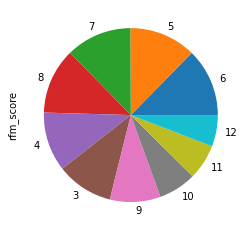

In [ ]:
rfm['rfm_score'].value_counts().plot(kind='pie')

In [ ]:
r = rfm['r_score'].astype(str)
f = rfm['f_score'].astype(str)
m = rfm['m_score'].astype(str)

In [ ]:
rfm['rfm'] = r.str.cat([f,m] ,sep= '-')

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,m_percentile,m_score,f_percentile,f_score,rfm_score,rfm
0,12346.0,14.0,3,77352.96,0.087571,4,0.001541,4,0.356703,2,10,4-2-4
1,12608.0,93.0,1,415.79,0.522599,2,0.639445,2,0.660760,1,5,2-1-2
2,12745.0,175.0,2,723.85,0.785568,1,0.471238,3,0.470981,2,6,1-2-3
3,12746.0,229.0,1,254.55,0.847714,1,0.787879,1,0.661017,1,3,1-1-1
4,12747.0,12.0,15,4679.78,0.077555,4,0.063688,4,0.037494,4,12,4-4-4


## Step 3：Analyze customers based on the RFM segments in which they appear

1. **Best Customers**
  - Customers who transacted recently, do so often and spend more than other customers
  - rfm: 1-1-1

2. **High-spending New Customers**
  - Customers who transacted only once, but very recently and they spent a lot
  - rfm: 1-4-1 or 1-4-2

3. **Lowest-spending Active Loyal Customers**
  - Customers who transacted recently and do so often, but spent the least
  - rfm: 1-1-3 or 1-1-4

4. **Churned Best Customers**
  - Customers who transacted frequently and spent a lot, but it’s been a long time since they’ve transacted
  - rfm: 4-1-1, 4-1-2, 4-2-1 or 4-2-2

In [ ]:
rfm_sg = rfm['rfm'].value_counts() #RFM segments

In [ ]:
rfm_sg

1-1-1    410
3-2-3    242
4-4-4    227
2-2-3    215
4-3-4    205
2-1-1    193
4-2-3    183
1-1-2    175
2-2-2    164
3-2-2    159
2-1-2    145
3-1-1    143
3-3-4    126
1-2-2    120
1-2-3    111
4-2-2    100
2-2-4     87
3-2-4     81
3-1-2     76
4-2-4     75
4-3-3     63
1-2-1     62
4-1-1     55
2-3-4     49
2-2-1     49
3-3-3     46
3-4-4     44
3-2-1     41
1-2-4     33
2-1-3     33
1-1-3     27
4-1-2     27
2-3-3     20
4-2-1     19
1-3-4     14
3-1-3     12
1-1-4     11
2-4-4     10
4-1-3      9
4-4-3      8
1-4-4      6
2-1-4      5
1-3-3      4
4-3-2      2
3-3-2      2
2-3-2      2
2-3-1      1
3-1-4      1
4-3-1      1
1-3-2      1
Name: rfm, dtype: int64

In [ ]:
'1-1-1' in rfm_sg #Check if Best Customers(rfm: '1-1-1') are in RFM segment

True

In [ ]:
best = rfm_sg['1-1-1'] 

In [ ]:
best

410

In [ ]:
('1-4-1' in rfm_sg, '1-4-2' in rfm_sg) #Check if High-spending New Customers(rfm: '1-4-1' or '1-4-2') are in RFM segment

(False, False)

In [ ]:
('1-1-3' in rfm_sg, '1-1-4' in rfm_sg) #Check if Lowest-spending Active Loyal Customers(rfm: '1-1-3' or '1-1-4') are in RFM segment

(True, True)

In [ ]:
lowsp_loyal = rfm_sg['1-1-3'] + rfm_sg['1-1-4']

In [ ]:
lowsp_loyal

38

In [ ]:
('4-1-1' in rfm_sg, '4-1-2' in rfm_sg, '4-2-1' in rfm_sg, '4-2-2' in rfm_sg) #Check if Churned Best Customers(rfm: '4-1-1', '4-1-2', '4-2-1' or '4-2-2')

(True, True, True, True)

In [ ]:
churn_best = rfm_sg['4-1-1'] + rfm_sg['4-1-2'] + rfm_sg['4-2-1'] + rfm_sg['4-2-2']

In [ ]:
churn_best

201

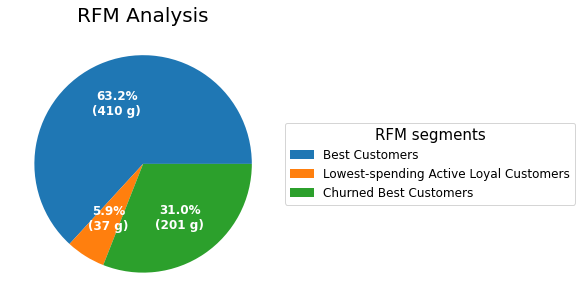

In [ ]:
# Visualize the RFM Analysis
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))


data = [best, lowsp_loyal, churn_best]
rfm_segments = ['Best Customers', 'Lowest-spending Active Loyal Customers', 'Churned Best Customers']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, rfm_segments,
          title="RFM segments",
          title_fontsize=15,
          fontsize=12,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("RFM Analysis",
             fontsize=20)

plt.show()

## Step 4: Personalized Offers based on RFM Analysis

**1. Best Customers**
- These customers likely generate a disproportionately high percentage of overall revenues
- It is important to make them feel valued and appreciated
- Focusing on keeping them happy should be a top priority
- Further analyzing their individual preferences will provide additional opportunities for even more personalized offers

**2. High-spending New Customers**
- These new customers spent a lot on their first purchase
- Like with the Best Customers group, it’s important to make them feel valued and appreciated
- Giving them terrific incentives to continue interacting

**3. Lowest-Spending Active Loyal Customers**
- These repeat customers are active and loyal, but they are low spenders
- Creating campaigns for this group that make them feel valued, and incentivize them to increase their spend levels
- As loyal customers, it often also pays to reward them with special offers if they spread the word about the brand to their friends, e.g., via social networks

**4. Churned Best Customers**
- These are valuable customers who stopped transacting a long time ago
- Like with the Best Customers group, it’s important to communicate with them on the basis of their specific preferences, as known from earlier transaction data
- It’s often challenging to re-engage churned customers, the high value of these customers makes it worthwhile trying

Resources: https://www.optimove.com/resources/learning-center/rfm-segmentation